## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [87]:
fun_df=pd.read_csv('fundamentals.csv')
sec_df=pd.read_csv('securities.csv')
sec_df.rename(columns={"Ticker symbol":"Ticker Symbol"},inplace=True)           #合并两张表，因为行业数据在securities.csv,但是2015净利润在fundamentals中
print(fun_df.columns)
print(sec_df.columns)

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [88]:
df=pd.merge(fun_df,sec_df,how="inner",on='Ticker Symbol')                  #这张合并的数据为之后处理用到，1-3题都用到
df


,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,For Year,Earnings Per Share,Estimated Shares Outstanding,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,0,AAL,2012-12-31,3.068000e+09,-2.220000e+08,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,2012.0,-5.60,3.350000e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
1,1,AAL,2013-12-31,4.975000e+09,-9.300000e+07,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,2013.0,-11.25,1.630222e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
2,2,AAL,2014-12-31,4.668000e+09,-1.600000e+08,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,2014.0,4.02,7.169154e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
3,3,AAL,2015-12-31,5.102000e+09,3.520000e+08,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,2015.0,11.39,6.681299e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
4,4,AAP,2012-12-29,2.409453e+09,-8.948200e+07,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,2012.0,5.29,7.328355e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
5,5,AAP,2013-12-28,2.609239e+09,-3.242800e+07,2.698000e+06,26.0,-1.957570e+08,5.312930e+08,40.0,...,2013.0,5.36,7.308918e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
6,6,AAP,2015-01-03,3.616038e+09,-4.820900e+07,3.092000e+06,25.0,-2.284460e+08,5.629450e+08,3.0,...,2014.0,6.75,7.315926e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
7,7,AAP,2016-01-02,3.757085e+09,-2.147600e+07,-7.484000e+06,19.0,-2.347470e+08,6.033320e+08,2.0,...,2015.0,6.45,7.339504e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
8,8,AAPL,2013-09-28,3.622300e+10,-1.949000e+09,1.156000e+09,30.0,-8.165000e+09,0.000000e+00,93.0,...,2013.0,40.03,9.252311e+08,Apple Inc.,reports,Information Technology,Computer Hardware,"Cupertino, California",1982-11-30,320193
9,9,AAPL,2014-09-27,4.864900e+10,-6.452000e+09,9.800000e+08,35.0,-9.571000e+09,0.000000e+00,40.0,...,2014.0,6.49,6.087827e+09,Apple Inc.,reports,Information Technology,Computer Hardware,"Cupertino, California",1982-11-30,320193


In [125]:
df15=df[df['For Year']==2015.0]                    #假设第一二三题都是基于这个，只考虑2015年的数据
df15

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,For Year,Earnings Per Share,Estimated Shares Outstanding,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
3,3,AAL,2015-12-31,5.102000e+09,3.520000e+08,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,2015.0,11.39,6.681299e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
7,7,AAP,2016-01-02,3.757085e+09,-2.147600e+07,-7.484000e+06,19.0,-2.347470e+08,6.033320e+08,2.0,...,2015.0,6.45,7.339504e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
10,10,AAPL,2015-09-26,6.067100e+10,-3.124000e+09,1.285000e+09,45.0,-1.124700e+10,0.000000e+00,52.0,...,2015.0,9.28,5.753664e+09,Apple Inc.,reports,Information Technology,Computer Hardware,"Cupertino, California",1982-11-30,320193
15,15,ABBV,2015-12-31,8.463000e+09,-1.076000e+09,-2.060000e+08,130.0,-5.320000e+08,1.308000e+10,77.0,...,2015.0,3.15,1.633016e+09,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
18,18,ABC,2015-09-30,2.157823e+10,-1.478793e+09,-4.422000e+07,22.0,-2.315850e+08,3.736477e+09,10.0,...,2015.0,-0.62,2.228468e+08,AmerisourceBergen Corp,reports,Health Care,Health Care Distributors,"Chesterbrook, Pennsylvania",NaN,1140859
23,23,ABT,2015-12-31,5.683000e+09,-1.710000e+08,4.790000e+08,21.0,-1.110000e+09,0.000000e+00,67.0,...,2015.0,2.94,1.504422e+09,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
26,26,ADBE,2015-11-27,7.793560e+08,-7.950200e+07,3.487000e+07,9.0,-1.849360e+08,4.184883e+09,180.0,...,2015.0,1.26,4.996437e+08,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343
30,30,ADI,2015-10-31,4.389040e+08,-7.119800e+07,6.303000e+06,14.0,-1.539600e+08,6.344840e+08,272.0,...,2015.0,0.31,2.247994e+09,"Analog Devices, Inc.",reports,Information Technology,Semiconductors,"Norwood, Massachusetts",NaN,6281
35,35,ADM,2015-12-31,1.340700e+10,9.130000e+08,3.920000e+08,10.0,-1.125000e+09,0.000000e+00,49.0,...,2015.0,2.99,6.183946e+08,Archer-Daniels-Midland Co,reports,Consumer Staples,Agricultural Products,"Decatur, Illinois",1981-07-29,7084
39,39,ADS,2015-12-31,1.010619e+09,8.307000e+06,0.000000e+00,30.0,-1.916830e+08,2.981041e+09,25.0,...,2015.0,8.91,6.695185e+07,Alliance Data Systems,reports,Information Technology,Data Processing & Outsourced Services,"Plano, Texas",2013-12-23,1101215


## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

In [64]:
df2015=df[df['For Year']==2015.0][['GICS Sector','Net Income']]            #提取出2015年的公司数据，取两列：行业、净利润,注意后者是2个中括号
df2015.sort_values(by=['Net Income'],ascending=False,inplace=True)
df2015=df2015.head(100)                #只取出净利润在前100的数据
df2015


,GICS Sector,Net Income
10,Information Technology,5.339400e+10
886,Financials,2.444200e+10
1685,Financials,2.289400e+10
691,Health Care,1.810800e+10
1669,Telecommunications Services,1.787900e+10
253,Financials,1.724200e+10
1708,Consumer Staples,1.636300e+10
1748,Energy,1.615000e+10
1497,Telecommunications Services,1.334500e+10
826,Information Technology,1.319000e+10


In [65]:
df2015.index=df2015['Net Income']
df2015=df2015.drop('Net Income',axis=1)
seq2015=df2015.values.ravel().tolist()               
seq2015            #只留下净利润前100的公司所属行业的列表


['Information Technology',
 'Financials',
 'Financials',
 'Health Care',
 'Telecommunications Services',
 'Financials',
 'Consumer Staples',
 'Energy',
 'Telecommunications Services',
 'Information Technology',
 'Information Technology',
 'Information Technology',
 'Consumer Discretionary',
 'Information Technology',
 'Consumer Discretionary',
 'Industrials',
 'Industrials',
 'Consumer Discretionary',
 'Consumer Staples',
 'Industrials',
 'Consumer Staples',
 'Consumer Discretionary',
 'Health Care',
 'Health Care',
 'Consumer Staples',
 'Information Technology',
 'Health Care',
 'Financials',
 'Consumer Staples',
 'Financials',
 'Information Technology',
 'Consumer Staples',
 'Consumer Staples',
 'Industrials',
 'Financials',
 'Health Care',
 'Industrials',
 'Industrials',
 'Industrials',
 'Industrials',
 'Energy',
 'Consumer Discretionary',
 'Industrials',
 'Materials',
 'Health Care',
 'Health Care',
 'Energy',
 'Financials',
 'Financials',
 'Energy',
 'Information Technology',
 'In

In [119]:
sec_list=df2015['GICS Sector'].unique()
sectors_count=[seq2015.count(i) for i in sec_list]
print(sec_list,sectors_count)              #算出饼图需要的元素,因为总数100，不需要再计算百分比


['Information Technology' 'Financials' 'Health Care'
 'Telecommunications Services' 'Consumer Staples' 'Energy'
 'Consumer Discretionary' 'Industrials' 'Materials' 'Utilities'
 'Real Estate'] [12, 19, 13, 3, 9, 5, 12, 18, 3, 5, 1]


<Figure size 720x720 with 0 Axes>

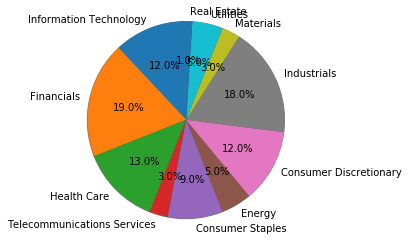

In [178]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = sec_list
sizes = sectors_count
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',radius=6,shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

In [121]:
#产生疑问，一张直方图中怎么展现不同行业的营收分布？因为一张图应该只能反映一个行业的营收分布吧?确定不是条形图而是直方图？
#还是说应该按照10各行业来十张小图，每个小图都是直方图？？

In [ ]:
#还有有疑问，一张直方图怎么反应不同行业的营收分布?真的不是柱形图吗？真的很奇怪。这道题有点奇怪。直方图是用来分析连续函数的分布的吧

In [ ]:
#我大概就按照2015年的不同行业的营业收入的柱形图来写吧

In [179]:
x=[]
for i in range(len(sec_list)):
    sec_df03=df15[df15['GICS Sector']==sec_list[i]]
    TR=sec_df03['Total Revenue'].sum()
    x.append(TR)
    i+=1
x

[857636234000.0,
 889688768000.0,
 1209256598000.0,
 310126000000.0,
 1420119242000.0,
 853435498000.0,
 1430273047000.0,
 1004514029000.0,
 267482155000.0,
 254462707000.0,
 73787324000.0]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

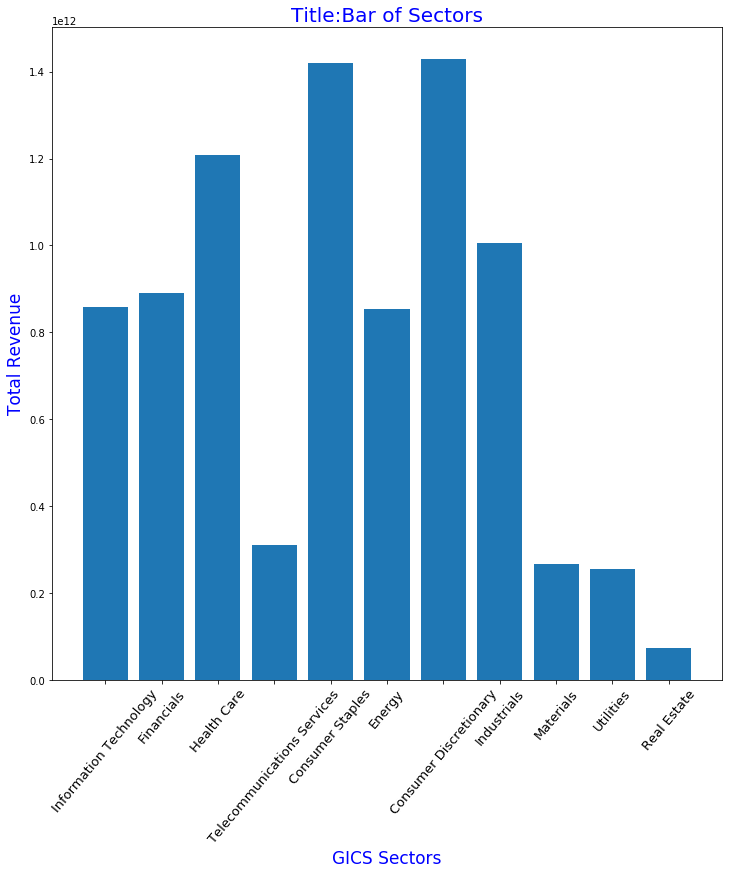

In [196]:
#绘图
plt.figure(figsize=(12,12))
plt.bar(sec_list,x)
plt.xlabel('GICS Sectors',color='b',fontsize=17)
plt.ylabel('Total Revenue',color='b',fontsize=17)
plt.title('Title:Bar of Sectors',color='b',fontsize=20)
plt.xticks(rotation=50,fontsize=13)


## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）和营收(Total Revenue)的比例 （40 分）

In [126]:
sec_list                              #这道题也默认是运用2015数据

array(['Information Technology', 'Financials', 'Health Care',
       'Telecommunications Services', 'Consumer Staples', 'Energy',
       'Consumer Discretionary', 'Industrials', 'Materials', 'Utilities',
       'Real Estate'], dtype=object)

In [141]:
sec_df03=df15[df15['GICS Sector']=='Financials']
sec_df03
FXTA=(sec_df03['Fixed Assets'].sum())/(sec_df03['Total Assets'].sum())
NITR=(sec_df03['Net Income'].sum())/(sec_df03['Total Revenue'].sum())
print(FXTA,NITR)

0.004313846848439651 0.1594826068434754


In [145]:
y=[]  #第一个比例,固定资产与总资产比例
z=[] #第二个比例，盈利与营收比例
for i in range(len(sec_list)):
    sec_df03=df15[df15['GICS Sector']==sec_list[i]]
    FXTA=(sec_df03['Fixed Assets'].sum())/(sec_df03['Total Assets'].sum())
    NITR=(sec_df03['Net Income'].sum())/(sec_df03['Total Revenue'].sum())
    y.append(FXTA)
    z.append(NITR)
    i+=1
print(y,z)
   

[0.1047647815128342, 0.004313846848439651, 0.09507162301379535, 0.3413518820068485, 0.2948419022789237, 0.6722712103758988, 0.29322514316790976, 0.31789418654051893, 0.4166452093754503, 0.7012198946426025, 0.7242670242808443] [0.17511255593708977, 0.1594826068434754, 0.0698822178351265, 0.11395045884575947, 0.05185427731849577, -0.06777945976650716, 0.06702801692382028, 0.0970135231431397, 0.03719249981367916, 0.09635672468107478, 0.18912982939996578]


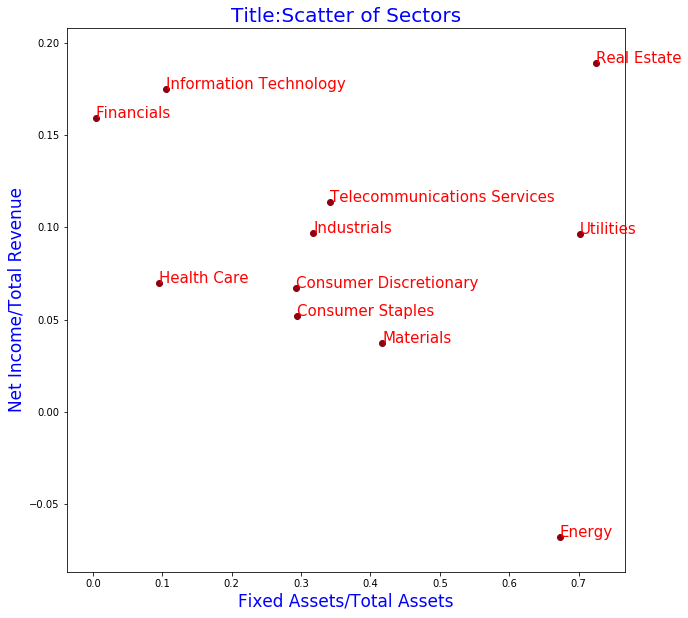

In [177]:
#绘图
plt.figure(figsize=(10,10))
plt.scatter(y, z,color='xkcd:crimson')
plt.xlabel('Fixed Assets/Total Assets',color='b',fontsize=17)
plt.ylabel('Net Income/Total Revenue',color='b',fontsize=17)
plt.title('Title:Scatter of Sectors',color='b',fontsize=20)          
n=len(sec_list)                               
for i in range(n):
    plt.annotate(sec_list[i],(y[i],z[i]),color='r',fontsize=15)     #每一个点上表明行业
